In [1]:
##pip install matplotlib

In [2]:
from fileinput import filename
import numpy as np
from copy import deepcopy

import time
import random
import csv
from PIL import Image
from PIL import Image as im
from numpy import asarray
import cv2
import math
import tkinter as tk
from PIL import Image, ImageTk
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)

In [3]:
root = tk.Tk()
root.title('Encryption')

''

In [4]:
def chooseFile():
    global img
    f_types = [('PNG Files', '*.png')]
    global filename
    filename = filedialog.askopenfilename(filetypes=f_types)
    img = Image.open(filename)
    img = img.resize((300, 200))
    img = ImageTk.PhotoImage(img)
    img_label = tk.Label(image=img)
    img_label.image = img
    img_label.grid(column=1, row=1)

    
    tk.Label(root,text="SECRET TEXT :",font = ('Helvetica', 18, 'bold')).grid(column= 1 ,row=2,  ipadx = 15 , ipady  = 5)
    inputtxt = tk.Entry(root)
    inputtxt.grid(column = 2 , row = 2 , ipadx = 15 , ipady = 5 , padx= 0) 

    enc_btn = tk.Button(root, textvariable=button_text, command=lambda: encrypt(inputtxt.get()),font=("Raleway", 13), bg="#000000", fg="white", height=2, width=12)
    button_text.set("Encrypt")
    enc_btn.grid(column=1, row=3)
    
    
    

In [5]:
# inputtxt = tk.Text(root,height = 5,width = 20)
# inputtxt.pack()

button_text = tk.StringVar()
send_btn_text = tk.StringVar()
send_btn = tk.Button(root, textvariable=send_btn_text, command=lambda: chooseFile(),
                     font=("Raleway", 13), bg="#000000", fg="white", height=2, width=12)
send_btn_text.set("Send")
send_btn.grid(column=1, row=0)

In [6]:
def findsize(s,N):
    while s%N != 0:
        N=N+1
    return s//N


In [7]:
def algrm1(m1,m2,N,divided_images):
    position_values = []
    x_coord = []
    y_coord = []

    for i in range(0,m1):


        for k in range(0,m2):
            pos_i = []
            x = []
            y = []
            for j in range(0,N):
                pos_i.append(divided_images[j][i][k])
                x.append(j)
                y.append(j)

            position_values.append(pos_i)
            x_coord.append(x)
            y_coord.append(y)
    return position_values,x_coord,y_coord

#     print(position_values)
#     print(x_coord)
#     print(np.asarray(position_values).shape)
#     print(y_coord)

In [8]:
# def check_writable(img):
#     #print("flag value")
#     img.setflags(write=1)
#     #print(img.flags)

In [9]:
def randMatrix(m1,m2):
    random_matrix = []
    for i in range(0,m1):
        random_matrix1 =  np.random.randint(256,size=(m2))
        random_matrix.append(random_matrix1)
    return random_matrix

In [10]:
def pol_val(cur_i,subi, N ,position_values,x_coord,y_coord,randMat,m2):
    
#     coefficient =np.poly1d( generate_polynomial((t-1)-ni , prime))
#   randVal=(np.polyval(coefficient,subi))%prime
#    tempi=1
#     for i in range(1,ni+1):
#             tempi=(tempi*(subi-i))%prime
#     tempi=(tempi*randVal)%prime
    
    tempix=0
    
    for i in range(0,N):
        tempj=1
        i_val = x_coord[cur_i][i]+1
        
        for j in range(0,N):
            j_val = y_coord[cur_i][j]+1
            if i_val!=j_val:
                subi_i=subi-j_val
                i_j=i_val-j_val
                mul=subi_i/i_j
                tempj=(tempj*mul)%257
#                 print(i," ",j," ",subi," ",abs(subi_i)," ",i_j)
        tempix=(tempix+(position_values[cur_i][i]*tempj))%257
        
    qxi=(tempix)%257
    
#     print(qxi,qxj)
    return int(qxi)^(int(randMat[cur_i//m2][cur_i%m2]))

In [11]:
def openNewWindow(N):
     
    # Toplevel object which will
    # be treated as a new window
    newWindow = tk.Toplevel(root)
 
    # sets the title of the
    # Toplevel widget
    newWindow.title("Shadow Image Window")

    # sets the geometry of toplevel
    newWindow.geometry("1200x300")
 
    # A Label widget to show in toplevel
    tk.Label(newWindow,text ="Shadow Images").pack()
    
    fig = plt.figure(figsize=(15,10))
    row = math.ceil(N / 3)
    column = 3
    
    for i in range(1,N+1):
        fig.add_subplot(row,column,i)
        image = cv2.imread('ShadowImage'+str(i)+'.png')
        plt.imshow(image)
        plt.axis('off')
        plt.title('ShadowImage'+str(i))
    
    canvas = FigureCanvasTkAgg(fig,master = newWindow)
    canvas.draw()
    canvas.get_tk_widget().pack()
    toolbar = NavigationToolbar2Tk(canvas,newWindow)
    toolbar.update()
    canvas.get_tk_widget().pack()
    
    newWindow.state('zoomed')

In [12]:
def binaryToDecimal(binary):
 
    decimal, i = 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return decimal

In [13]:
def data_embed(inputtxt,N,m1,m2,boolean):
    
    length_inputtxt = len(inputtxt)
    var = ''.join(format(i,'08b')for i in bytearray(inputtxt,encoding = 'utf-8'))
    text =""
    #print("the binary form of sec txt is " + var)
    
    
    for i in range(0,len(var)):
        img_number = i%N 
        position = i%(m1*m2)
        bit_position = i % 8
        position_x = position // m2
        position_y = position % m2
        numpydata = []
        numpy3d = []
        t1 = []
        t2 = []
        
        image = Image.open('ShadowImage'+str(img_number+1)+'.png')
        if(boolean > 0):
            
            numpy3d = deepcopy(np.asarray(image))
            numpydata,t2,t1 = cv2.split(numpy3d)
            print('R values' , list(numpydata))
            print('  numpydata3d is ' , list(numpy3d))
        else: 
            numpydata = np.asarray(image)
        numpydata=numpydata.astype(int)
        
        positionval = format(numpydata[position_x][position_y],'08b')
        
        print("for i th bit", i , " " , numpydata[position_x][position_y] )
        print("for i th bit", i , " " , positionval)
        pos_var = positionval[0:bit_position]+var[i]
        if(bit_position != 7):
            pos_var = pos_var + positionval[bit_position+1:]
        #positionval[-bit_position] = var[i]
        numpydata[position_x][position_y] = binaryToDecimal(int(pos_var))
        var_int = int(var[i])
        position_int = int(positionval[bit_position])
        
        text = text + str((position_int)^(var_int))
        
        
        #check_writable(numpydata)
        if(boolean >0):
            print()
            numpy3d = []
            for x in range(0,m1):
                row = []
                
                for y in range(0,m2):
                    row.append([numpydata[x][y] , t2[x][y] , t1[x][y]])
                numpy3d.append(row)
            numpydata = numpy3d
            
        
        numpydata = np.array(numpydata)       
        data=im.fromarray((numpydata).astype(np.uint8))
        data.save('ShadowImage'+str(img_number+1)+'.png')
        print("for i ",i,"ith bit " , img_number+1 , "pos x" ,position_x , "pos y", position_y ,"bit pos",bit_position )
        print(numpydata[position_x][position_y])
    
    return text

In [14]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return mse,"Infinity"
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return mse,psnr


In [15]:
def calculate_ber(image1, image2):
    
    different_bits = np.count_nonzero(image1 != image2)
    total_bits = image1.size
    ber = different_bits / total_bits
    
    return ber


In [16]:
def Performance():
    
    newWindow = tk.Toplevel(root)
    newWindow.title("Performance Window")
    newWindow.geometry("1200x300")
    tk.Label(newWindow,text ="Performance window ")
    
    
    image = Image.open("DecryptedImage.png")
    decrypted = np.asarray(image)    
    image = Image.open(filename)
    secret = np.asarray(image)
    mse,psnr=PSNR(secret,decrypted)
    ber=calculate_ber(secret,decrypted)
    
    
    tk.Label(newWindow,text="The PSNR Value is:",font = ('Helvetica', 18, 'bold')).grid(column= 1 ,row=6,  ipadx = 15 , ipady  = 5)
    tk.Label(newWindow,text=psnr,font = ('Helvetica', 15)).grid(column= 3 ,row=6,  ipadx = 15 , ipady  = 5)
    
    tk.Label(newWindow,text="The MSE Value is:",font = ('Helvetica', 18, 'bold')).grid(column= 1 ,row=10,  ipadx = 15 , ipady  = 5)
    tk.Label(newWindow,text=mse,font = ('Helvetica', 15)).grid(column= 3 ,row=10,  ipadx = 15 , ipady  = 5)
    
    tk.Label(newWindow,text="The BER Value is:",font = ('Helvetica', 18, 'bold')).grid(column= 1 ,row=15,  ipadx = 15 , ipady  = 5)
    tk.Label(newWindow,text=ber,font = ('Helvetica', 15)).grid(column= 3 ,row=15,  ipadx = 15 , ipady  = 5)
    

In [17]:
def encrypt(inputtxt):
    
    start = time.time()
    
    image = Image.open(filename)
    numpydata = np.asarray(image)
    numpydata=numpydata.astype(int)
    

    boolean=0
    if len(numpydata.shape)==2:
        boolean=0
        maxi=max(max(x) for x in numpydata)
        if maxi==1:
            boolean=-1
            for i in range(0,numpydata.shape[0]):
                for j in range(0,numpydata.shape[1]):
    #                 print(numpydata[i][j])
                    if numpydata[i][j]==1:
                        numpydata[i][j]=255 
            print(numpydata)
    elif len(numpydata.shape)==3:
        boolean=1
    
    N = 5
    m1 = findsize(numpydata.shape[0],N)
   
    N1 = numpydata.shape[0] // m1
    m2 = numpydata.shape[1]
    N=min(m1,N1)
    
    
    m1=max(m1,N1)
    
    
    fig = plt.figure(figsize=(15,10))
    row = math.ceil(N / 3)
    column = 3
    
    divided_images = []
    for j in range(0,N):
        divided_images.append(numpydata[(j)* m1 : ((j)*m1)+m1 , :])
    
    if(boolean > 0):
        b=[]
        g=[]
        r=[]
        for i in range (0,N):
            tempb,tempg,tempr = cv2.split(divided_images[i])
            b.append(tempb)
            g.append(tempg)
            r.append(tempr)
        randMatR= randMatrix(m1,m2)
        randMatG= randMatrix(m1,m2)
        randMatB= randMatrix(m1,m2)
        position_valuesR,x_coordR,y_coordR=algrm1(m1,m2,N,r)
        position_valuesG,x_coordG,y_coordG=algrm1(m1,m2,N,g)
        position_valuesB,x_coordB,y_coordB=algrm1(m1,m2,N,b)
        
#         data=im.fromarray(np.array(randMat).astype(np.uint8))
#         data.save('ShadowImage'+str(0)+'.png')
        for i in range(0,N+1):
            col = 0
            Img = []

            #print(">>>>For ",i,"th n value<<<<")
            for j in range(0,m1):
                I_row =[]
            
                for k in range(0,m2):
                    if(i==0):
                        I_row.append([randMatR[j][k],randMatG[j][k],randMatB[j][k]])
                        
                    else:
                        qxR = pol_val(( (j*m2)+k), i, N ,position_valuesR,x_coordR,y_coordR ,randMatR,m2)
                        print("qxR values:" , qxR)
                        qxG = pol_val(( (j*m2)+k), i, N ,position_valuesG,x_coordG,y_coordG,randMatG,m2)
                        print("qxG values:" , qxG)
                        qxB = pol_val(( (j*m2)+k), i, N ,position_valuesB,x_coordB,y_coordB,randMatB,m2)
                        print("qxB values:" , qxB)
                        
                        I_row.append([qxR,qxG,qxB])
                Img.append(I_row)
        
            Img=np.array(Img)
            #check_writable(Img)
            data=im.fromarray((Img).astype(np.uint8))

            data.save('ShadowImage'+str(i)+'.png')
            print("for i th image ",i, " ", Img)
        text =''
        text = data_embed(inputtxt,N,m1,m2,boolean)

    else:
        position_values,x_coord,y_coord=algrm1(m1,m2,N,divided_images)
        randMat=randMatrix(m1,m2)

        data=im.fromarray(np.array(randMat).astype(np.uint8))
        data.save('ShadowImage'+str(0)+'.png')


        for i in range(1,N+1):
            col = 0
            Img = []

            #print(">>>>For ",i,"th n value<<<<")
            for j in range(0,m1):
                I_row =[]
                for k in range(0,m2):
                    qxi = pol_val(( (j*m2)+k), i, N ,position_values,x_coord,y_coord ,randMat,m2)
                    I_row.append(qxi)
                Img.append(I_row)

            Img=np.array(Img)
            #check_writable(Img)
            data=im.fromarray((Img).astype(np.uint8))

            data.save('ShadowImage'+str(i)+'.png')
            print("for i th image ",i, " ", Img)
   
        text = data_embed(inputtxt,N,m1,m2,boolean)
    #print(len(text))
    
    for i in range(1,N+1):
        fig.add_subplot(row,column,i)
        image = cv2.imread('ShadowImage'+str(i)+'.png')
        plt.imshow(image)
        plt.axis('off')
        plt.title('ShadowImage'+str(i))
    

    
    with open("Nandm1andm2.txt","w") as f:
        f.write("'N_value','m1','m2','bool'")
        f.write("\n")
        f.write(str(N)+","+str(m1)+","+str(m2)+","+str(boolean)+",")
        f.write(text)
    
    end = time.time()
    
    print("the elapsed time is" , end-start)
    
    window_btn = tk.Button(root,text ="View Shadow Images",command = lambda: openNewWindow(N),font=("Raleway", 13), bg="#000000", fg="white", height=2, width=30)
    window_btn.grid(column =1,row=4)

    window_btn1 = tk.Button(root,text ="Performance analysis",command = lambda: Performance(),font=("Raleway", 13), bg="#000000", fg="white", height=2, width=30)
    window_btn1.grid(column =1,row=8)

for i th image  1   [[ 69 204 240 ...  28 211 203]
 [ 28 125 223 ...   1 116  41]
 [255 139 252 ...  94  78 230]
 ...
 [142  35 125 ...   7  47 118]
 [109   2 135 ... 140  43  45]
 [221 209 216 ... 158 140 148]]
for i th image  2   [[108 237 213 ...  27 207 208]
 [198 162   4 ...   6 104  50]
 [ 59  79  40 ...  94  82 254]
 ...
 [135  48 107 ...  12  40 115]
 [121  27 171 ... 135  44  40]
 [195 201 245 ... 148 139 144]]
for i th image  3   [[ 64 196 227 ...  31 200 213]
 [239 143  48 ...   2 111  55]
 [ 29 106  26 ...  90  85 248]
 ...
 [198  14  87 ...   8  37 125]
 [ 62  36 159 ... 255  39  38]
 [136 141 199 ... 236 129 146]]
for i th image  4   [[ 15 143 207 ...  23 189 215]
 [162 187  25 ... 117  19  57]
 [ 47  91  55 ...  44  45 240]
 ...
 [175  24  69 ...  14  36 122]
 [ 87  50 131 ... 135  35  32]
 [231 228 221 ... 149 138 158]]
for i th image  5   [[ 98 228 212 ...  18 202 216]
 [211 175  10 ...   8 109  52]
 [ 34  75  36 ...  45  87 249]
 ...
 [184 113  40 ...  11  36 113]
 [ 

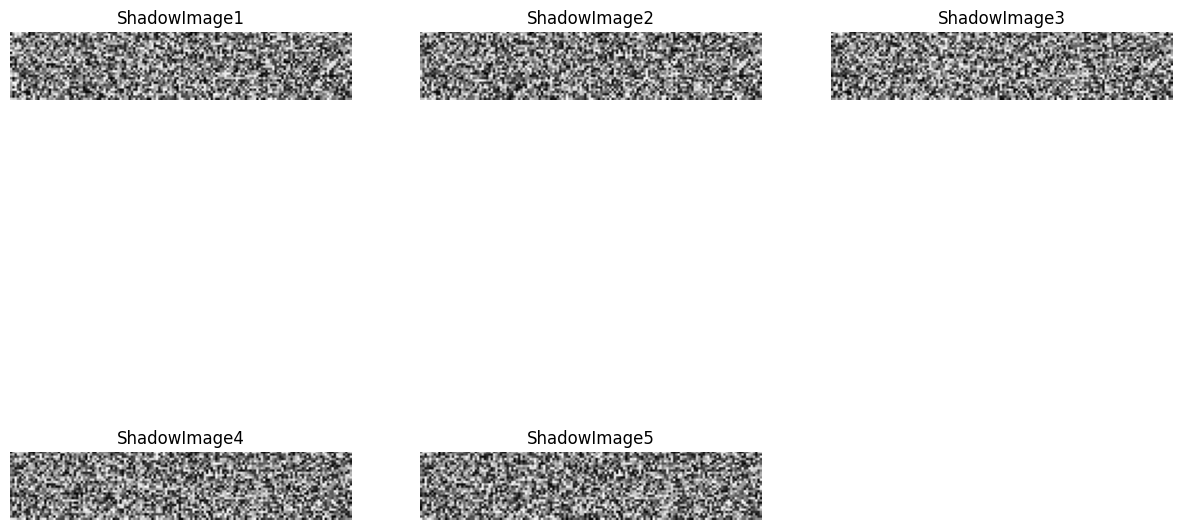

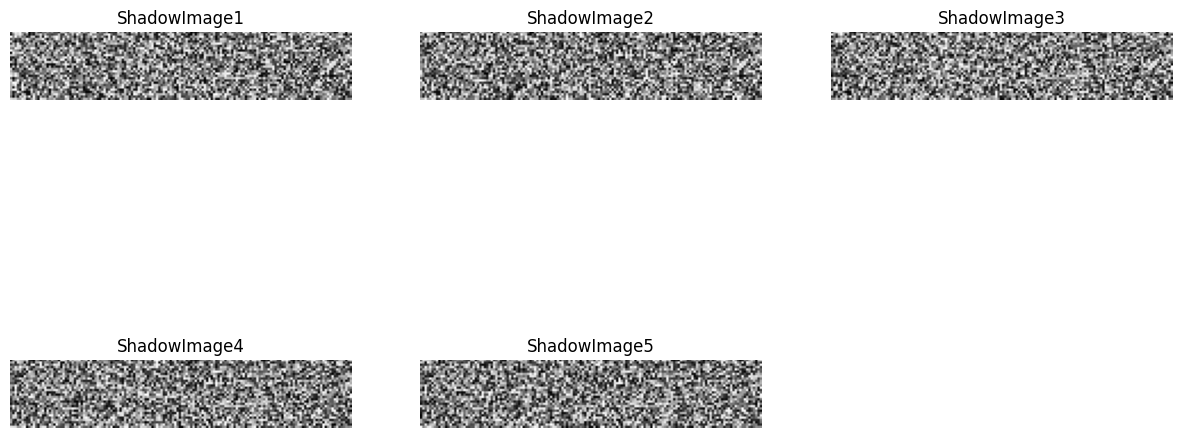

In [18]:
canvas = tk.Canvas(root, width=600, height=300)
canvas.grid(columnspan=3, rowspan=3)

root.mainloop()